In [1]:
# %matplotlib inline
# %matplotlib notebook
from dataGen import Gen
from multiscale_vae import vae
from train import slidingWindow, criterion, train, test

import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.distributions


import numpy as np
import matplotlib.pyplot as plt

In [13]:
# all parameters for generating the time series should be configured in this cell
periode = 15 #days
step = 5 # mess interval in minutes
val = 100
n_channels = 3
effects = {
    "Pulse": {
        "occurances":0,
        "max_amplitude":2,   
        "interval":20
        },
    "Trend": {
        "occurances":0,
        "max_slope":0.005,
        "type":"mixed"
        },
    "Seasonality": {
        "occurances":3,
        "frequency_per_week":(7, 14),
        "amplitude_range":(5, 20),
        },
    "std_variation": {
        "occurances":3,
        "max_value":10,
        "interval":1000,
        },
    "channels_coupling":{
        "occurances":0,
        "coupling_strengh":20
        },
    "Noise": {
        "occurances":0,
        "max_slope":0.005,
        "type":"linear"
        }
    }

### Init Model
latent_dims = 20
L = 240
device = 'cuda' if torch.cuda.is_available() else 'cpu'

v = vae(n_channels, L, latent_dims)
opt = optim.Adam(v.parameters(), lr = 0.001)

{'n': 4320, 'nchannels': 3, 'mu': array([[77.      , 77.      , 77.      , ..., 77.      , 77.      ,
        77.      ],
       [51.657383, 51.56696 , 51.46633 , ..., 49.637836, 49.4276  ,
        49.210484],
       [24.396646, 24.60131 , 24.799623, ..., 21.      , 21.      ,
        21.      ]], dtype=float32), 'cov': array([[[1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.]]], dtype=float32)}


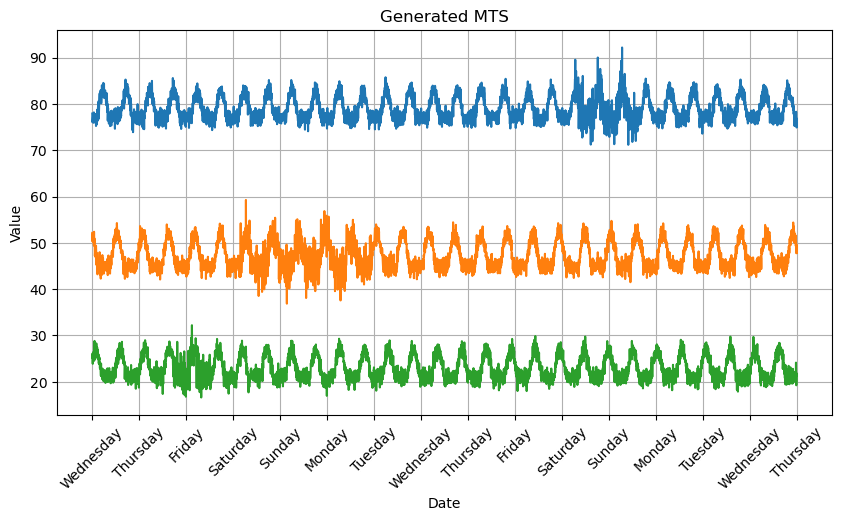

In [14]:
X = Gen(periode, step, val, n_channels, effects)
x, params, e_params = X.parameters()
print(params)
# print(e_params)
X.show()

In [77]:
# serie = torch.tensor(serie).float()
x = torch.FloatTensor(x)
n = x.shape[1]

train_ = x[:, :int(0.8*n)]
val_   = x[:, int(0.8*n):int(0.9*n)]
test_  = x[:, int(0.9*n):]

# train_set = slidingWindow(train, 30)
# val_set = slidingWindow(val, 30)
# test_set = slidingWindow(test, 30)

train_data = DataLoader(slidingWindow(train_, L),
                        batch_size=10,
                        shuffle = False
                        )
val_data = DataLoader(slidingWindow(val_, L),
                        batch_size=10,
                        shuffle = False
                        )
test_data = DataLoader(slidingWindow(test_, L),
                        batch_size=10,
                        shuffle = False
                        )

In [78]:
for epoch in range(1, 100):
    train(v, train_data, criterion, opt, device, epoch)

Train Epoch: 1 [0/3216 (0%)]	Loss: 10752.377344
Train Epoch: 1 [1000/3216 (31%)]	Loss: 10454.759375
Train Epoch: 1 [2000/3216 (62%)]	Loss: 10835.212500
Train Epoch: 1 [3000/3216 (93%)]	Loss: 9146.039844
====> Epoch: 1 Average loss: 10643.6419
Train Epoch: 2 [0/3216 (0%)]	Loss: 8442.657812
Train Epoch: 2 [1000/3216 (31%)]	Loss: 7329.116406
Train Epoch: 2 [2000/3216 (62%)]	Loss: 6927.423437
Train Epoch: 2 [3000/3216 (93%)]	Loss: 5066.532812
====> Epoch: 2 Average loss: 7120.8552
Train Epoch: 3 [0/3216 (0%)]	Loss: 4560.590234
Train Epoch: 3 [1000/3216 (31%)]	Loss: 3760.811719
Train Epoch: 3 [2000/3216 (62%)]	Loss: 3408.945312
Train Epoch: 3 [3000/3216 (93%)]	Loss: 2324.054688
====> Epoch: 3 Average loss: 3614.1919
Train Epoch: 4 [0/3216 (0%)]	Loss: 2088.236914
Train Epoch: 4 [1000/3216 (31%)]	Loss: 1671.410742
Train Epoch: 4 [2000/3216 (62%)]	Loss: 1404.013672
Train Epoch: 4 [3000/3216 (93%)]	Loss: 936.777930
====> Epoch: 4 Average loss: 1570.9486
Train Epoch: 5 [0/3216 (0%)]	Loss: 858.53

Train Epoch: 36 [1000/3216 (31%)]	Loss: 9.208759
Train Epoch: 36 [2000/3216 (62%)]	Loss: 5.535809
Train Epoch: 36 [3000/3216 (93%)]	Loss: 35.555911
====> Epoch: 36 Average loss: 28.9955
Train Epoch: 37 [0/3216 (0%)]	Loss: 13.689796
Train Epoch: 37 [1000/3216 (31%)]	Loss: 24.914305
Train Epoch: 37 [2000/3216 (62%)]	Loss: 6.667912
Train Epoch: 37 [3000/3216 (93%)]	Loss: 35.524683
====> Epoch: 37 Average loss: 28.4160
Train Epoch: 38 [0/3216 (0%)]	Loss: 13.156384
Train Epoch: 38 [1000/3216 (31%)]	Loss: 12.783257
Train Epoch: 38 [2000/3216 (62%)]	Loss: 5.234472
Train Epoch: 38 [3000/3216 (93%)]	Loss: 34.018719
====> Epoch: 38 Average loss: 28.0774
Train Epoch: 39 [0/3216 (0%)]	Loss: 17.988034
Train Epoch: 39 [1000/3216 (31%)]	Loss: 9.211790
Train Epoch: 39 [2000/3216 (62%)]	Loss: 9.533021
Train Epoch: 39 [3000/3216 (93%)]	Loss: 34.979767
====> Epoch: 39 Average loss: 29.3461
Train Epoch: 40 [0/3216 (0%)]	Loss: 12.964944
Train Epoch: 40 [1000/3216 (31%)]	Loss: 8.499002
Train Epoch: 40 [2000

Train Epoch: 71 [3000/3216 (93%)]	Loss: 38.570804
====> Epoch: 71 Average loss: 23.5288
Train Epoch: 72 [0/3216 (0%)]	Loss: 11.384872
Train Epoch: 72 [1000/3216 (31%)]	Loss: 6.719535
Train Epoch: 72 [2000/3216 (62%)]	Loss: 8.682782
Train Epoch: 72 [3000/3216 (93%)]	Loss: 27.613660
====> Epoch: 72 Average loss: 23.7657
Train Epoch: 73 [0/3216 (0%)]	Loss: 11.465470
Train Epoch: 73 [1000/3216 (31%)]	Loss: 6.422479
Train Epoch: 73 [2000/3216 (62%)]	Loss: 4.654838
Train Epoch: 73 [3000/3216 (93%)]	Loss: 29.150858
====> Epoch: 73 Average loss: 22.8246
Train Epoch: 74 [0/3216 (0%)]	Loss: 12.470561
Train Epoch: 74 [1000/3216 (31%)]	Loss: 6.769180
Train Epoch: 74 [2000/3216 (62%)]	Loss: 7.689807
Train Epoch: 74 [3000/3216 (93%)]	Loss: 32.880789
====> Epoch: 74 Average loss: 24.2584
Train Epoch: 75 [0/3216 (0%)]	Loss: 14.057657
Train Epoch: 75 [1000/3216 (31%)]	Loss: 6.513577
Train Epoch: 75 [2000/3216 (62%)]	Loss: 4.375191
Train Epoch: 75 [3000/3216 (93%)]	Loss: 30.574750
====> Epoch: 75 Averag

In [79]:
def compare(dataset, model):
    model.eval()
    rec = []
    x = []
    with torch.no_grad():
        for i, data in enumerate(dataset):
            x_rec, mu, logvar = model(data)
            z = v.reparametrization_trick(mu, logvar)

            x.extend(data[:,:,0].detach().numpy())
            rec.extend(x_rec[:].detach().numpy())
        
    print(mu[-1, :], logvar[-1, :])
    plt.plot(rec, "r--")
    plt.plot(x[:-L], "b-")
    plt.ylim(0,100)
    plt.grid(True)
    
    return z[-1, :]

tensor([ 7.4085e-02, -2.1496e-02, -8.1454e-02, -2.8275e-02, -7.2846e-03,
         1.3861e-02, -2.9781e-02, -6.6743e-02, -5.5921e-02, -8.9047e-02,
        -9.1804e-03, -1.1343e-02,  2.4557e-02,  1.0037e-02,  7.5098e-02,
        -6.3916e-02,  7.4883e-02, -3.1143e-02,  9.3135e-02,  6.6997e-01,
        -4.6142e-04, -2.9373e-02,  1.0042e-01, -1.1702e-01,  1.9712e-01,
        -1.9209e-01, -3.4530e-02, -9.0154e-02, -5.7684e-02,  3.2870e-02,
         9.9543e-02, -4.3170e-02,  1.7894e-02,  1.4452e-02,  4.0053e-03,
         4.4154e-02,  6.5724e-02,  8.7833e-02, -1.4840e-01, -1.6507e-02]) tensor([ 1.1470e-01,  1.1846e-01,  5.6552e-02,  3.8568e-01, -4.4762e-02,
         1.8350e-01,  5.4768e-03, -1.6224e-01,  3.2567e-02, -1.7881e-01,
         1.2980e-01,  1.2642e-02,  7.9334e-02, -1.2919e-01,  9.6651e-02,
        -3.1757e-02,  2.8900e-01,  8.2120e-02, -3.6059e-02, -3.0889e+00,
        -4.8533e-03,  1.4185e-02, -1.8992e-02, -7.6260e-03, -1.6282e-02,
        -3.1654e-02,  6.0112e-03, -1.2383e-02, -1.

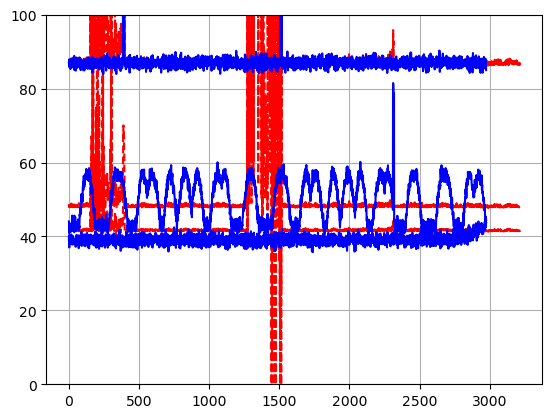

In [81]:
z = compare(train_data, v)

In [73]:
test(v, test_data, criterion, device)

====> Test set loss: nan


1000


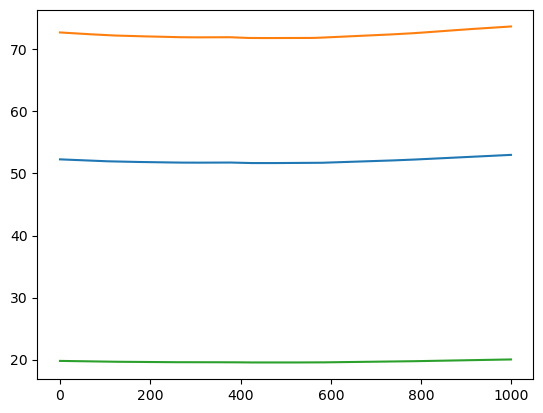

In [36]:
rec = []
for i in range(1000):
    z[16] = 0.01*i
    
    x_rec = v.decoder(z)

    rec.append(x_rec.detach().numpy())
print(len(rec))
plt.plot(rec)

In [37]:
z = np.arange(0.001,1, 0.01)
z

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.481, 0.491, 0.501, 0.511, 0.521, 0.531,
       0.541, 0.551, 0.561, 0.571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991])

In [40]:
# %matplotlib 
# import ipywidgets as widgets

# z = np.arange(16)
# @interact(z, np.arange(0.001,10, 0.01))
def experiment(z,z_num):
    rec = []
    for i in range(1000):
        z[z_num] = 0.01*i

        x_rec = v.decoder(z)

        rec.append(x_rec.detach().numpy())
    print(len(rec))
    plt.plot(rec)
    
# widgets.interact(experiment, z)

1000


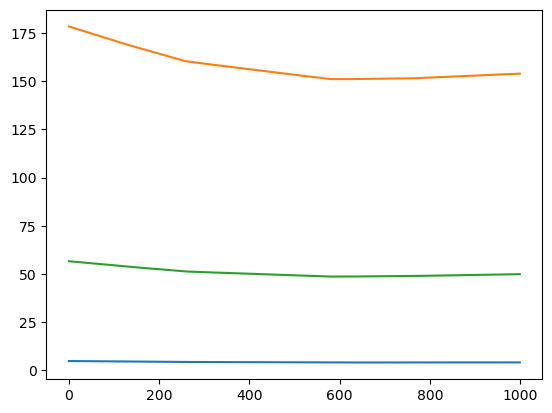

In [64]:
experiment(z,3)

In [ ]:
1) Pulse/ Rechteck
2) Trends (linear or not)
3) Periodicity
std. effects
5) coupling durch cov matrix
6) Noise
7) Effect of latent dim änderung, welche größe ist am besten  geeignet, soll latent_dim = n_channels sein? couploung durch hiarchie?
Modeling of interactions effects in die simulation hilft um die interpretation zu validieren, man kann die effecte aus der realen daten 
besser mathematisch verstehen
8) Short and long term effects durch die verschiedenen Convolutions weights"aktivierung von neuronen/ welche neuraonen sind mehr active in welche fälle"
idee is to know what layers capt long term effects and which layers capt short terms to be able to better interpret the data
9) also change the effects to be intern effects -> they happen on the level of mean and std rather than additif to the channels and let only be some random noise additif (y = x +epsilon)
all the rest (trends, seasonalities, pulses should happen on the level of mean and std)


Write and document all the steps I wanna do and make check list
try to make the data scales and dimention real (x axes represents tims -> days, hours, secs / are the seasonalities daily or weekly etc)

In [4]:
60/5

12.0

In [5]:
12*24

288

In [6]:
288*7

2016

In [7]:
2016*4

8064

In [8]:
60*24

1440

In [4]:
array = np.random.randint(10, size=(5,5))

In [5]:
array

array([[1, 8, 4, 1, 3],
       [6, 5, 3, 9, 6],
       [9, 1, 9, 4, 2],
       [6, 7, 8, 8, 9],
       [2, 0, 6, 7, 8]])

In [16]:
channels = [2,4]
start_idx = [1,2]
end_idx = [4,4]
[array[channels[i],start_idx[i]:end_idx[i]] for i in range(len(channels))]
# array[channels[,]start_idx]

[array([1, 9, 4]), array([6, 7])]